In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import kruskal

In [2]:
df = pd.read_excel('Health Insurance Dataset.xlsx')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Level,score
0,19.0,female,27.900,0.0,yes,southwest,16884.924,B,72.0
1,18.0,male,33.770,1.0,no,southeast,1725.5523,C,69.0
2,28.0,male,33.000,3.0,no,southeast,4449.462,B,90.0
3,33.0,male,22.705,0.0,no,northwest,21984.47061,A,47.0
4,32.0,male,28.880,0.0,no,northwest,3866.8552,C,76.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1339 non-null   object 
 6   charges   1339 non-null   object 
 7   Level     1338 non-null   object 
 8   score     1338 non-null   float64
dtypes: float64(4), object(5)
memory usage: 94.9+ KB


In [5]:
df.isnull().sum()

age         10
sex         10
bmi         10
children    10
smoker      10
region       9
charges      9
Level       10
score       10
dtype: int64

In [6]:
#Fill Null Values for both Continuous and Categorical Variables
df['age'] = df['age'].fillna(df['age'].mean())
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['children'] = df['children'].fillna(df['children'].mean())
df['score'] = df['score'].fillna(df['score'].mean())

df['sex'] = df['sex'].fillna('unknown')
df['smoker'] = df['smoker'].fillna('unknown')
df['region'] = df['region'].fillna('unknown')
df['charges'] = df['charges'].fillna('unknown')
df['Level'] = df['Level'].fillna('unknown')

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
Level       0
score       0
dtype: int64

In [8]:
#Check for Inconsistent Entries
inconsistent_entries = {}
for column in df.select_dtypes(include='object').columns:
    unique_values = df[column].unique()
    inconsistent_entries[column] = df[column].unique()
    print(f"{column}: {(unique_values)}")

sex: ['female' 'male' 'unknown']
smoker: ['yes' 'no' 'unknown']
region: ['southwest' 'southeast' 'northwest' 'northeast' 'unknown' ' ']
charges: [16884.924 1725.5523 4449.462 ... 29141.3603 'unknown' ' ']
Level: ['B' 'C' 'A' 'D' 'E' 'unknown']


In [9]:
df.loc[:,'charges'] = df['charges'].replace({'unknown': '0.0', ' ': '0.0'})
df.loc[:,'region'] = df['region'].replace({' ': 'unknown'})

In [10]:
#Check for Inconsistent Entries
inconsistent_entries = {}
for column in df.select_dtypes(include='object').columns:
    unique_values = df[column].unique()
    inconsistent_entries[column] = df[column].unique()
    print(f"{column}: {(unique_values)}")

sex: ['female' 'male' 'unknown']
smoker: ['yes' 'no' 'unknown']
region: ['southwest' 'southeast' 'northwest' 'northeast' 'unknown']
charges: [16884.924 1725.5523 4449.462 ... 2007.945 29141.3603 '0.0']
Level: ['B' 'C' 'A' 'D' 'E' 'unknown']


In [11]:
#Convert Charges Column to a Float Datatype
df.loc[:,'charges'] = df['charges'].astype(float)
df['charges'] = pd.to_numeric(df['charges'], errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1348 non-null   float64
 1   sex       1348 non-null   object 
 2   bmi       1348 non-null   float64
 3   children  1348 non-null   float64
 4   smoker    1348 non-null   object 
 5   region    1348 non-null   object 
 6   charges   1348 non-null   float64
 7   Level     1348 non-null   object 
 8   score     1348 non-null   float64
dtypes: float64(5), object(4)
memory usage: 94.9+ KB


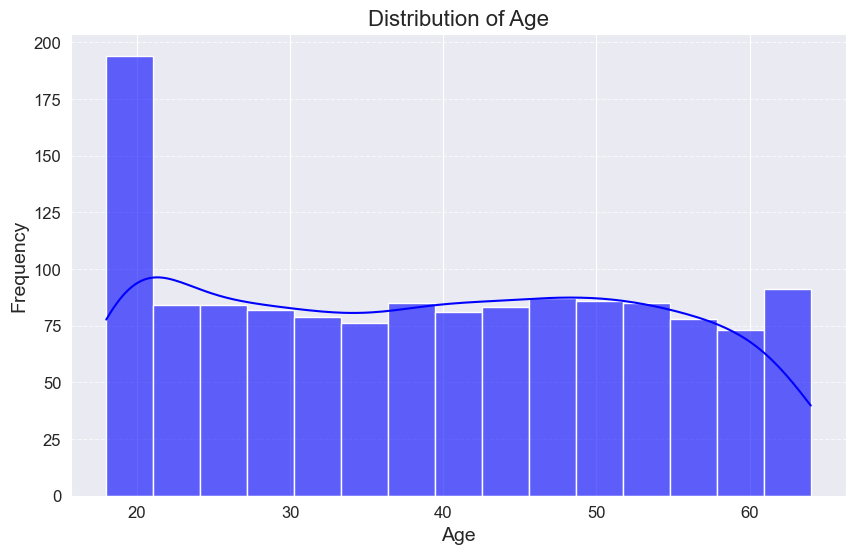

In [13]:
########################################## PART 1 - A - 1 Univariate Statistics ###############################################################################################
#CONTINUOUS VARIABLE - AGE

# Histogram and KDE for Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, color='blue', bins=15, alpha=0.6)
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
df.age.describe()

count    1348.000000
mean       39.207025
std        13.997710
min        18.000000
25%        27.000000
50%        39.103513
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [15]:
ageSkew = df.age.skew()
ageMedian = df.age.median()
print(f'Age Skew: {ageSkew}')
print(f'Age Median: {ageMedian}')

Age Skew: 0.05587970661853736
Age Median: 39.10351270553065


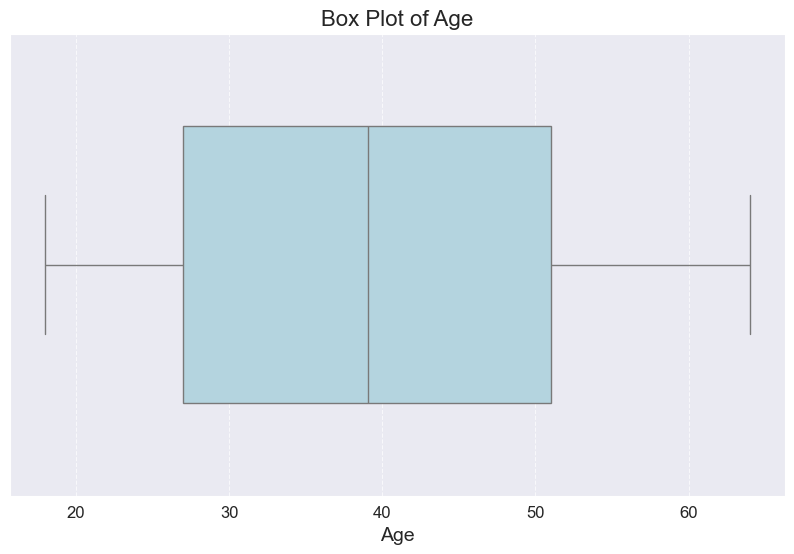

In [16]:
# Box Plot for Age Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age'], color='lightblue', width=0.6)
plt.title('Box Plot of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.xticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

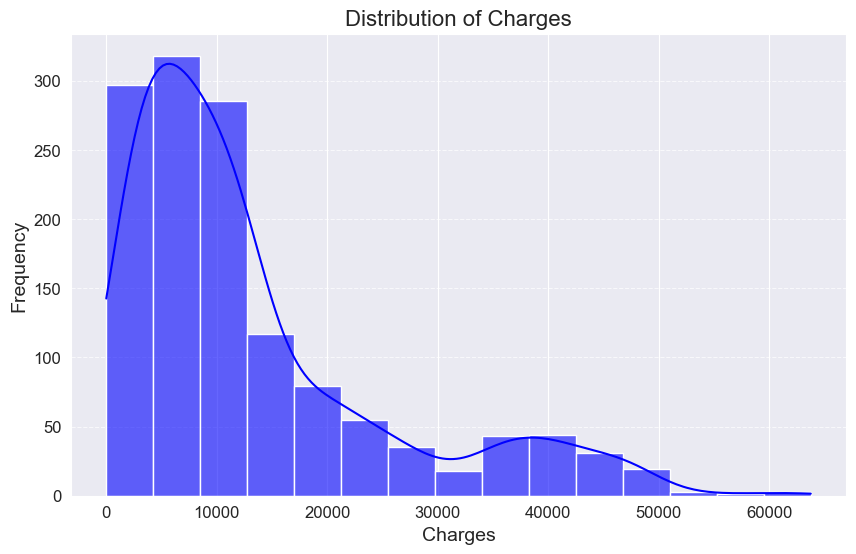

In [17]:
###################################################################################################
#CONTINUOUS VARIABLE - CHARGES

# Histogram and KDE for Charges Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, color='blue', bins=15, alpha=0.6)
plt.title('Distribution of Charges', fontsize=16)
plt.xlabel('Charges', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
df.charges.describe()

count     1348.000000
mean     13171.976996
std      12118.635252
min          0.000000
25%       4669.881912
50%       9289.083100
75%      16486.225762
max      63770.428010
Name: charges, dtype: float64

In [19]:
chargesSkew = df.charges.skew()
chargesMedian = df.charges.median()
print(f'Charges Skew: {chargesSkew}')
print(f'Charges Median: {chargesMedian}')

Charges Skew: 1.5160437263561592
Charges Median: 9289.0831


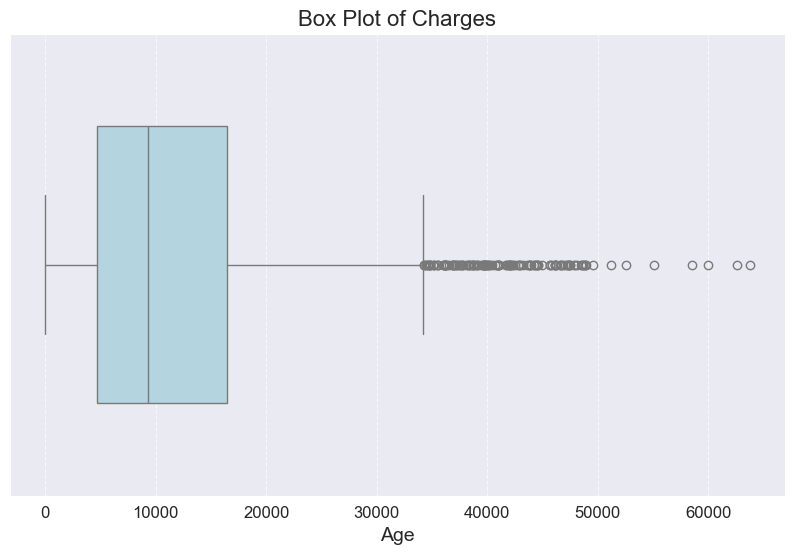

In [20]:
# Box Plot for Charges Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['charges'], color='lightblue', width=0.6)
plt.title('Box Plot of Charges', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.xticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [21]:
###################################################################################################
#CATEGORICAL VARIABLES - SEX
df['sex'].describe()

count     1348
unique       3
top       male
freq       676
Name: sex, dtype: object

In [22]:
df['sex'].value_counts()

sex
male       676
female     662
unknown     10
Name: count, dtype: int64

In [23]:
df['sex'].value_counts(normalize=True)

sex
male       0.501484
female     0.491098
unknown    0.007418
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Distribution of Sex')

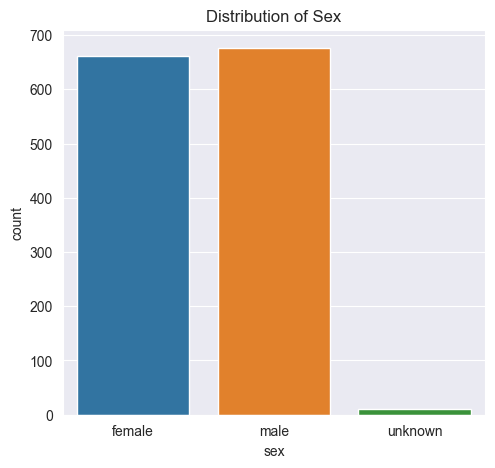

In [24]:
# Distribution of SEX
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='sex', data=df, hue='sex', legend=False)
plt.title('Distribution of Sex')

In [25]:
###################################################################################################
#CATEGORICAL VARIABLES - SMOKER
df['smoker'].describe()

count     1348
unique       3
top         no
freq      1064
Name: smoker, dtype: object

In [26]:
df['smoker'].value_counts()

smoker
no         1064
yes         274
unknown      10
Name: count, dtype: int64

In [27]:
df['smoker'].value_counts(normalize=True)

smoker
no         0.789318
yes        0.203264
unknown    0.007418
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Distribution of Smoker')

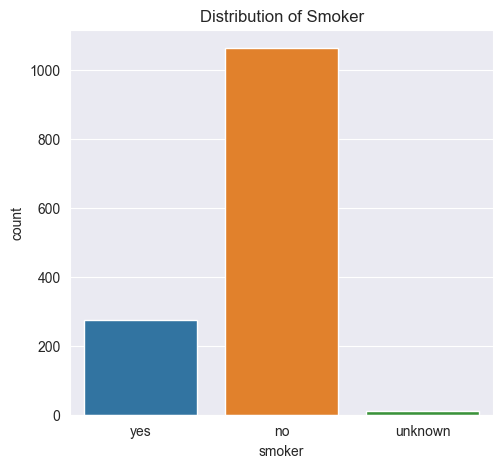

In [28]:
# Distribution of SMOKER
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='smoker', data=df, hue='smoker', legend=False)
plt.title('Distribution of Smoker')

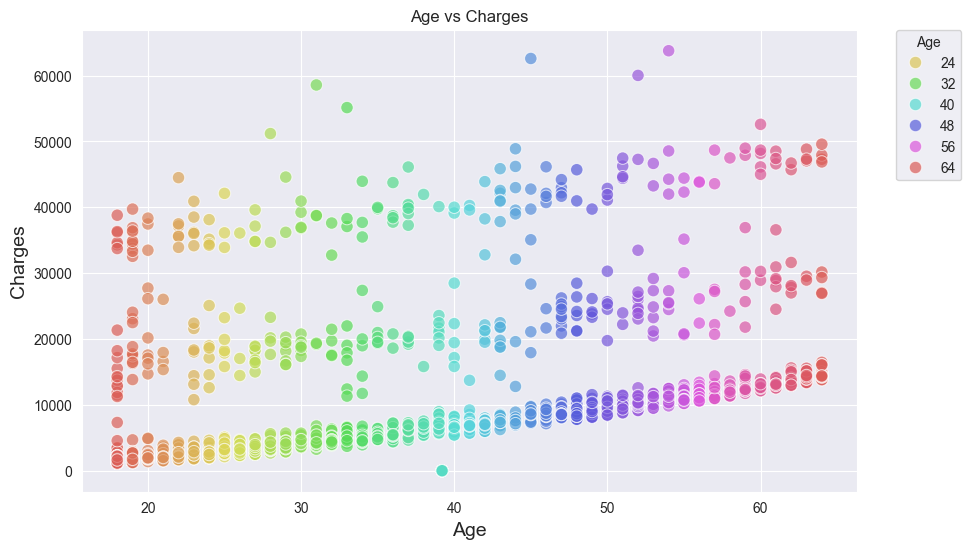

Spearman Correlation: 
              age   charges
age      1.000000  0.528306
charges  0.528306  1.000000


In [29]:
########################################## PART 1 - B - 1  Bivariate Statistics ###############################################################################################
#CONTINUOUS VARIABLE - Age / Charges
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='age', y='charges', data=df, hue='age', palette='hls', alpha=0.7, s=80)
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Age vs Charges')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Charges', fontsize=14)
plt.show()
spearman_corr = df[['age','charges']].corr(method='spearman')
print ("Spearman Correlation: ")
print(spearman_corr)

<Axes: >

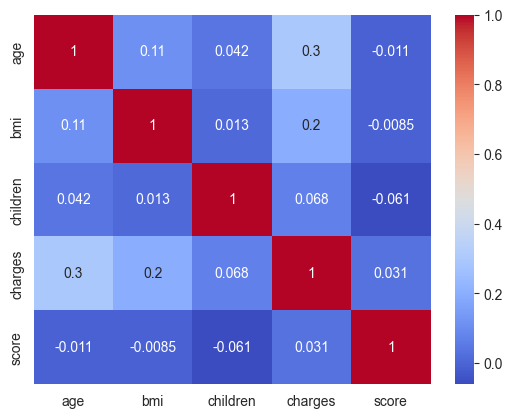

In [30]:
#############################################################ANOTHER WAY TO LOOK HOW CONTINUOUS VARIABLES CORRELATE TO EACH OTHER###################################################################################
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

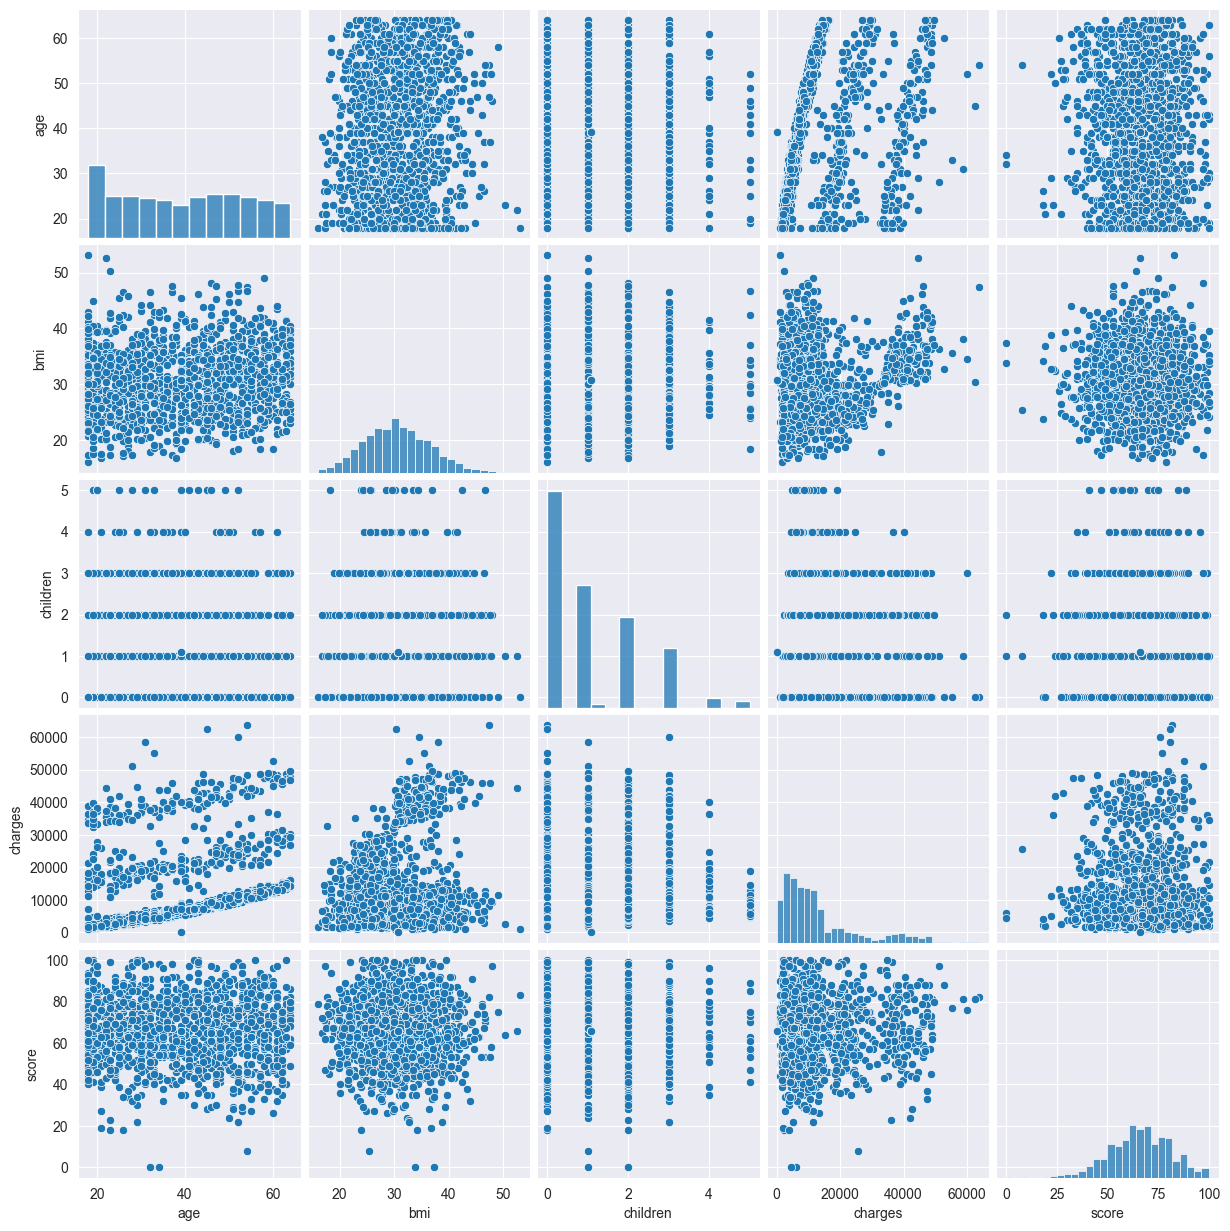

In [31]:
sns.pairplot(df)
plt.show()

In [32]:
#####################################################################################################################################################################################

In [33]:
########################################## PART 1 - B - 1  Bivariate Statistics ###############################################################################################
#CATEGORICAL VARIABLE - SEX / SMOKER
contingency = pd.crosstab(df['sex'], df['smoker'])
print("Contingency Table:")
print(contingency)

Contingency Table:
smoker    no  unknown  yes
sex                       
female   547        0  115
male     517        0  159
unknown    0       10    0


In [34]:
#Perform / Print Chi Square Test
chi2, p, dof, expected = chi2_contingency(contingency)
np.set_printoptions(suppress=True, precision=2)
print(f"\nChi-Square Test Results:\nChi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(expected)


Chi-Square Test Results:
Chi2: 1355.823962291898, p-value: 2.6204799744370223e-292, Degrees of Freedom: 4

Expected Frequencies Table:
[[522.53   4.91 134.56]
 [533.58   5.01 137.41]
 [  7.89   0.07   2.03]]


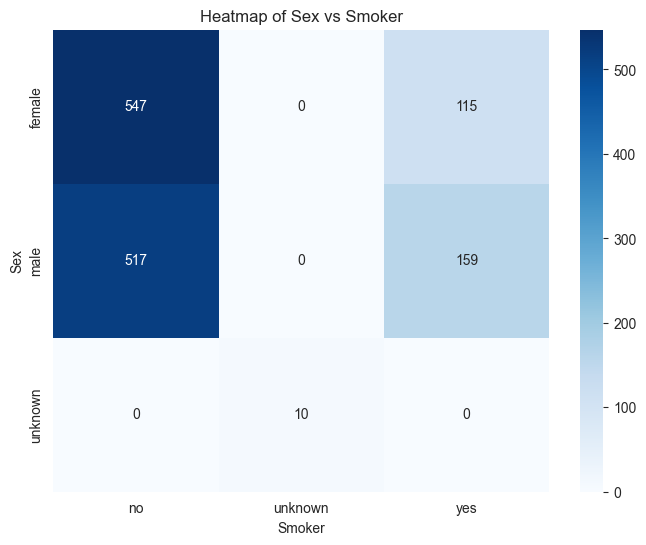

In [35]:
#Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Sex vs Smoker')
plt.xlabel('Smoker')
plt.ylabel('Sex')
plt.show()

In [36]:
# Contingency Table for 'region' and 'smoker'
contingency2 = pd.crosstab(df['region'], df['smoker'])
print("\nContingency Table for Region and Smoker:")
print(contingency2)


Contingency Table for Region and Smoker:
smoker      no  unknown  yes
region                      
northeast  257        0   67
northwest  267        0   58
southeast  273        0   91
southwest  267        0   58
unknown      0       10    0


In [37]:
#Perform a Chi Square Test
chi2, p, dof, expected = chi2_contingency(contingency2)
np.set_printoptions(suppress=True, precision=2)
print(f"\nChi-Square Test Results:\nChi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(expected)


Chi-Square Test Results:
Chi2: 1355.3983617506558, p-value: 2.4881061887050274e-287, Degrees of Freedom: 8

Expected Frequencies Table:
[[255.74   2.4   65.86]
 [256.53   2.41  66.06]
 [287.31   2.7   73.99]
 [256.53   2.41  66.06]
 [  7.89   0.07   2.03]]


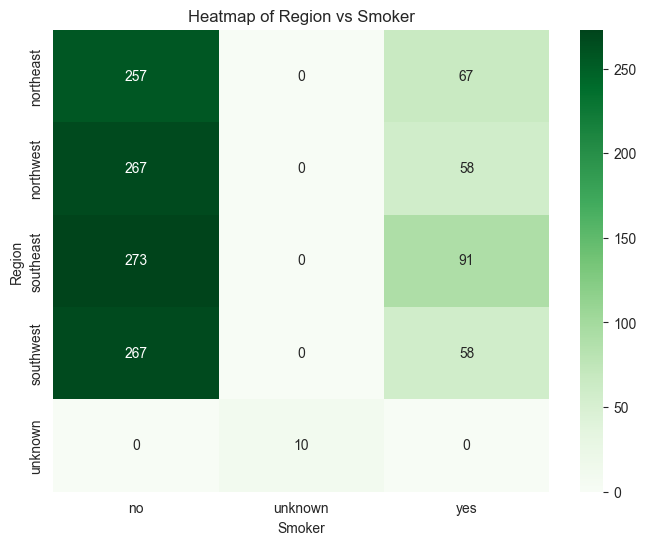

In [38]:
#Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency2, annot=True, cmap='Greens', fmt='d')
plt.title('Heatmap of Region vs Smoker')
plt.xlabel('Smoker')
plt.ylabel('Region')
plt.show()

In [39]:
########################################################################################### PART 2 : PARAMETRIC STATISTICAL TESTING ############################################################################################

In [40]:
########################################## PART 2 - C - 1 ###############################################################################################

In [41]:
#--------------------------------------Does smoking have an effect on a person's BMI?----------------------------------------------

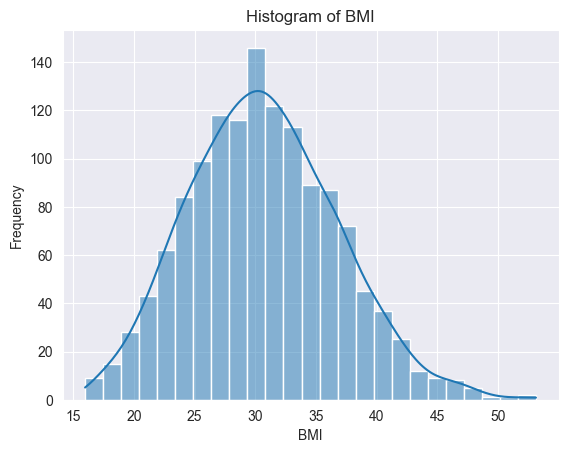

In [42]:
# Plot Histogram for BMI
sns.histplot(df['bmi'], kde=True)
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [43]:
# Separate BMI data for smokers and non-smokers
smokers_bmi = df[df['smoker'] == 'yes']['bmi']
non_smokers_bmi = df[df['smoker'] == 'no']['bmi']

In [44]:
# Perform t-test on BMI
t_stat, p_value = stats.ttest_ind(smokers_bmi, non_smokers_bmi, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation of results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in BMI between smokers and non-smokers.")
else:
    print("Fail to reject the null hypothesis: No significant difference in BMI between smokers and non-smokers.")

T-statistic: 0.13352121947242343
P-value: 0.8938465511712552
Fail to reject the null hypothesis: No significant difference in BMI between smokers and non-smokers.


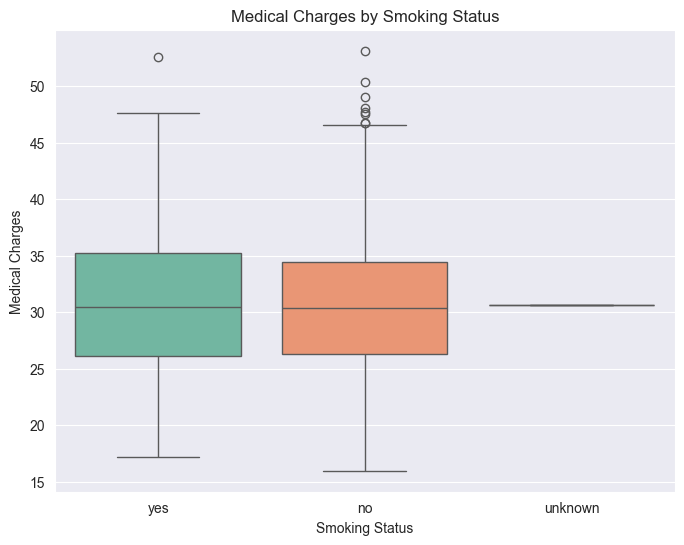

In [45]:
#Plot Using Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='bmi', data=df, palette="Set2", hue='smoker')
plt.title('Medical Charges by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Medical Charges')
plt.show()

In [46]:
########################################################################################### PART 3 : NONPARAMETRIC STATISTICAL TESTING ############################################################################################

In [47]:
########################################## PART 3 - G - 1 ###############################################################################################
#----------------------Is there a significant difference in insurance charges based on gender and BMI categories?

In [48]:
# Create BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(categorize_bmi)

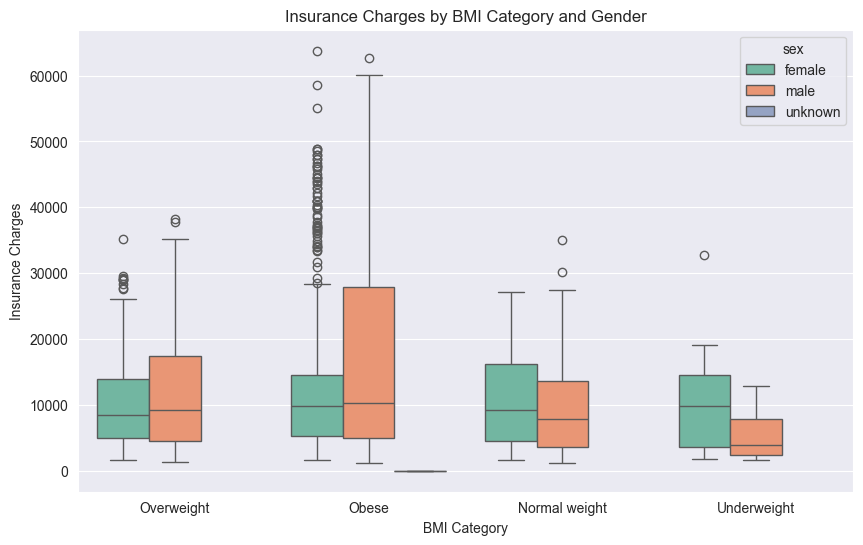

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bmi_category', y='charges', hue='sex', data=df, palette='Set2')
plt.title('Insurance Charges by BMI Category and Gender')
plt.xlabel('BMI Category')
plt.ylabel('Insurance Charges')
plt.show()

In [50]:
# Separate the data by gender
male_data = df[df['sex'] == 'male']
female_data = df[df['sex'] == 'female']

# Perform Kruskal-Wallis test for each gender
kruskal_results_male = kruskal(male_data[male_data['bmi_category'] == 'Underweight']['charges'],
                               male_data[male_data['bmi_category'] == 'Normal weight']['charges'],
                               male_data[male_data['bmi_category'] == 'Overweight']['charges'],
                               male_data[male_data['bmi_category'] == 'Obese']['charges'])

kruskal_results_female = kruskal(female_data[female_data['bmi_category'] == 'Underweight']['charges'],
                                 female_data[female_data['bmi_category'] == 'Normal weight']['charges'],
                                 female_data[female_data['bmi_category'] == 'Overweight']['charges'],
                                 female_data[female_data['bmi_category'] == 'Obese']['charges'])

print("Kruskal-Wallis Test for Males:")
print(f"Statistic: {kruskal_results_male.statistic}, P-value: {kruskal_results_male.pvalue}")

print("Kruskal-Wallis Test for Females:")
print(f"Statistic: {kruskal_results_female.statistic}, P-value: {kruskal_results_female.pvalue}")

Kruskal-Wallis Test for Males:
Statistic: 19.034708537726395, P-value: 0.0002689180387534419
Kruskal-Wallis Test for Females:
Statistic: 2.2104329699955088, P-value: 0.5298963260772489
